# 1. Начало работы
### Подключим библиотеки и загрузим данные

In [1]:
# Базовые библиотеки
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import skew
from math import sqrt

%matplotlib inline

# Все для машинного обучения
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import sklearn.metrics as sklm


# Игнорируем ошибки
import warnings
warnings.filterwarnings(action="ignore")

In [2]:
# Загружаем тренировочный и тестовый датасеты
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

## 1.1. Посмотрим на наш датасет

In [3]:
# Тренировочный датасет
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Сводная информация по датасету
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
# Количество строк наблюдений и колонок
train.shape

(1460, 81)

## 1.2. Соединяем тренировочный и тестовый датасеты

In [6]:
df = pd.concat([train,test], keys=['x', 'y'])
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
x 0   1          60       RL         65.0     8450   Pave   NaN      Reg   
  1   2          20       RL         80.0     9600   Pave   NaN      Reg   
  2   3          60       RL         68.0    11250   Pave   NaN      IR1   
  3   4          70       RL         60.0     9550   Pave   NaN      IR1   
  4   5          60       RL         84.0    14260   Pave   NaN      IR1   

    LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
x 0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
  1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
  2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
  3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
  4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   

    MoSold YrSold  SaleType  SaleCondition  SalePrice  
x 0      2   2008        WD         Normal   208500.0  
  1      5   2007        WD         Normal   181500.0  
  2      9   2008        WD         Normal   223500.0  
  3      2   2006        WD        Abnorml   140000.0  
  4     12   2008        WD         Normal   250000.0  

[5 rows x 81 columns]

# 2. Подготовка датасета

In [7]:
# Для начала сделаем небольшую сводку всех колонок по пропущенным значениям
pd.DataFrame({'Miss Count': df.isnull().sum().sort_values(ascending=False), 
                            'Percent': (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False)}).head(25)

,Miss Count,Percent
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
SalePrice,1459,0.499829
FireplaceQu,1420,0.486468
LotFrontage,486,0.166495
GarageQual,159,0.054471
GarageYrBlt,159,0.054471
GarageFinish,159,0.054471


In [8]:
# Используем метод прямого заполнения тех столбцов, которые имеют категориальный признак
columns = ['Electrical', 'SaleType', 'KitchenQual', 'Exterior1st', 'Exterior2nd', 'Functional', 'Utilities', 'MSZoning']
for column in columns:
    df[column].fillna(method='ffill', inplace=True)

In [9]:
# Все доступные типы данных в датасете
df.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [10]:
# Разделяем названия колонок на категориальные и числовые, чтобы было удобнее заполнить пустые значения
numeric_features = df.select_dtypes(exclude='object').columns.tolist()
categorial_features = df.select_dtypes(include='object').columns.tolist()
numeric_features.remove('SalePrice')

In [11]:
# Заполняем пустые значения
df['LotFrontage'].fillna(df['LotFrontage'].mean(), inplace=True)
df[categorial_features] = df[categorial_features].fillna("none")
df[numeric_features] = df[numeric_features].fillna(0)

In [12]:
# Проверим, заполнили ли мы пропущенные значения
pd.DataFrame({'Miss Count': df.isnull().sum().sort_values(ascending=False), 
                            'Percent': (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False)}).head(25)

,Miss Count,Percent
SalePrice,1459,0.499829
Heating,0,0.000000
RoofStyle,0,0.000000
RoofMatl,0,0.000000
Exterior1st,0,0.000000
Exterior2nd,0,0.000000
MasVnrType,0,0.000000
MasVnrArea,0,0.000000
ExterQual,0,0.000000
ExterCond,0,0.000000


In [13]:
# Создадим новые колонки, в которые заполним данные, исходя из наших логических убеждений
df['TotalArea'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF'] + df['GrLivArea'] + df['GarageArea']
df['Bathrooms'] = df['FullBath'] + df['HalfBath'] * 0.5 
df['Year average']= (df['YearRemodAdd'] + df['YearBuilt']) / 2

# 3. Визуализация данных

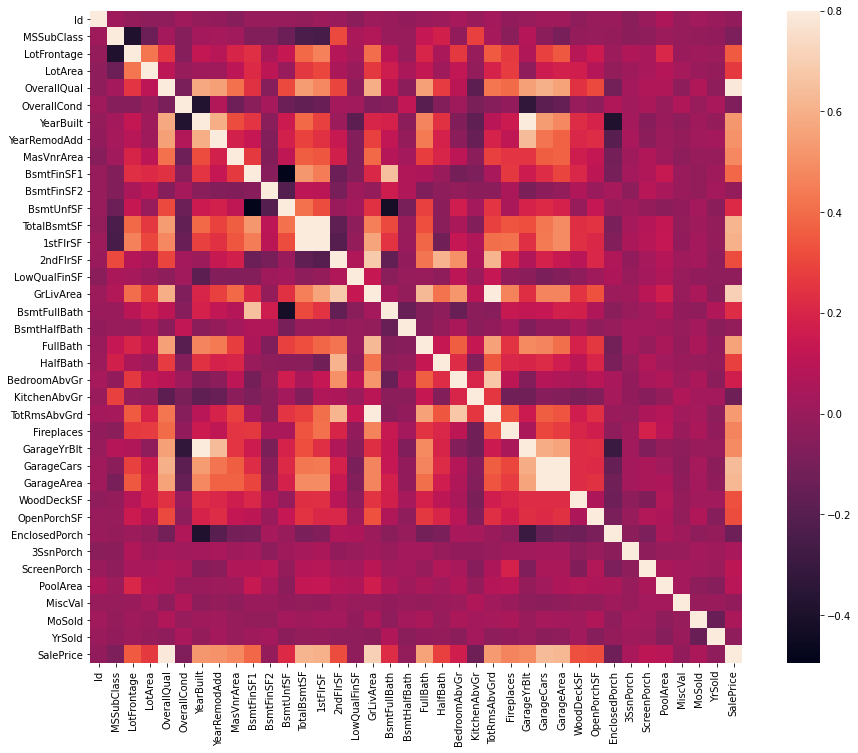

In [14]:
# Построим график корреляции
plt.figure(figsize=(16, 12))
sns.heatmap(train.corr(), vmax=.8, square=True);

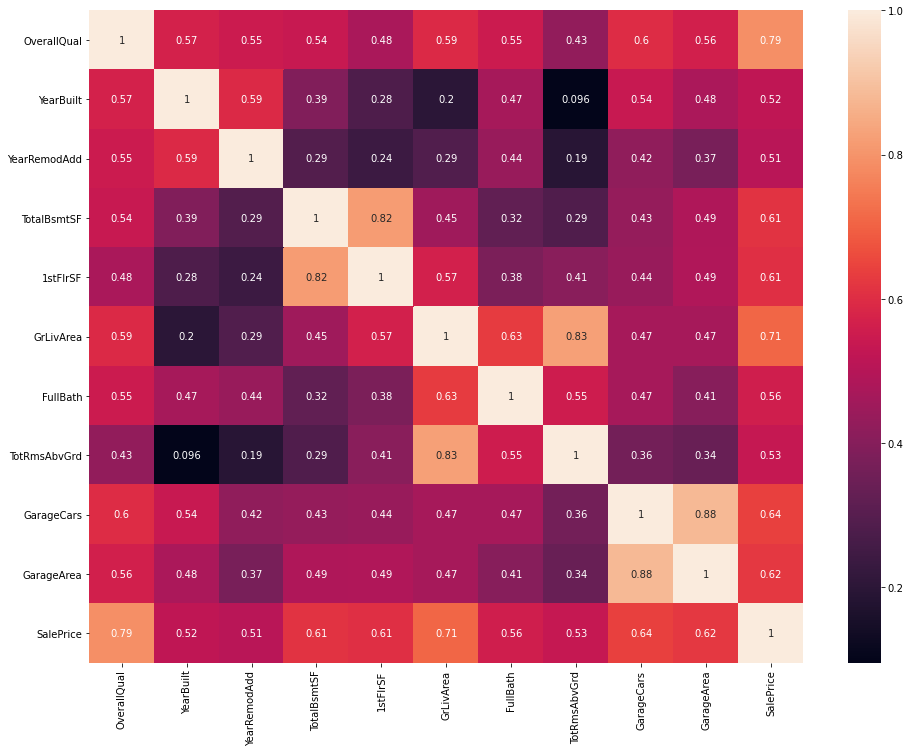

In [15]:
# Увеличиваем масштаб графика корреляции верхних значений SalePrice
top_features = train.corr().index[abs(train.corr()["SalePrice"]) > 0.5]
plt.figure(figsize=(16,12))
sns.heatmap(train[top_features].corr(), annot=True);

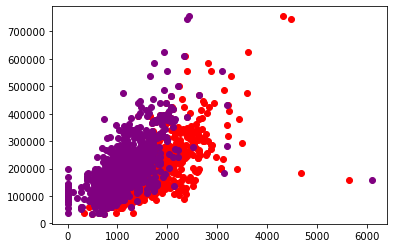

In [16]:
# Делаем проверку на выбросы
plt.scatter(train['GrLivArea'], train['SalePrice'], c='red');
plt.scatter(train['TotalBsmtSF'], train['SalePrice'], c='purple');

In [17]:
# Находим выбросы
train.sort_values(by='GrLivArea', ascending=False)[:2]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [18]:
# Удаляем выбросы
df.drop(df[df['Id'] == 1299].index, inplace=True)
df.drop(df[df['Id'] == 524].index, inplace=True)

# 4. Финальная предобработка данных

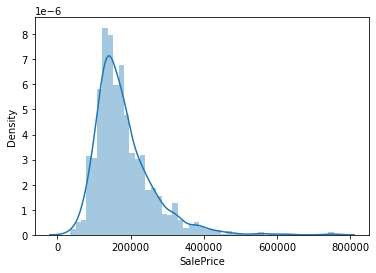

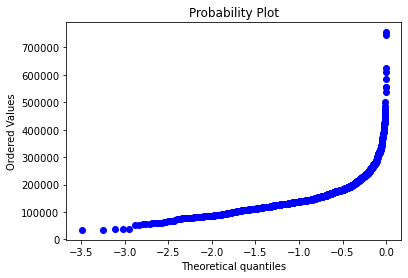

In [19]:
# Видно, что целевая переменная искажена
sns.distplot(df['SalePrice']);
plt.figure()
stats.probplot(df['SalePrice'], plot=plt);

In [20]:
# Преобразуем целевую переменную в соответсвии с нормальным распределением
train['SalePrice'] = np.log1p(train['SalePrice'])

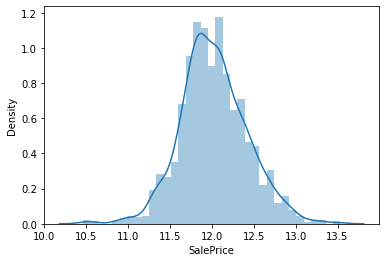

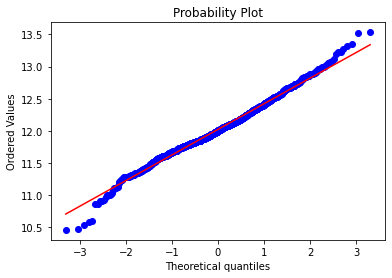

In [21]:
# Теперь видно, что целевая переменная имеет нормальный вид
sns.distplot(train['SalePrice']);
plt.figure()
stats.probplot(train['SalePrice'], plot=plt);

In [22]:
# Преобразуем данные этих колонок к строковому типу
df['MSSubClass'] = df['MSSubClass'].apply(str)
df['YrSold'] = df['YrSold'].astype(str)

In [23]:
# Проверка асимметрии других переменных и ее обработка
df.skew(axis=0).sort_values(ascending=False).head()

MiscVal         21.950962
PoolArea        17.697766
LotArea         13.116240
LowQualFinSF    12.090757
3SsnPorch       11.377932
dtype: float64

In [24]:
# Снижаем асимметрию
num_features = df.select_dtypes(include=np.number).columns.tolist()
df[num_features] = np.log1p(df[num_features])

In [25]:
# Теперь видно, что асимметрия снизилась
df.skew(axis=0).sort_values(ascending=False).head()

PoolArea        15.631314
3SsnPorch        8.826656
LowQualFinSF     8.559041
MiscVal          5.214687
BsmtHalfBath     3.775149
dtype: float64

In [26]:
# Преобразование категориальных признаков в числовые
df_new = pd.get_dummies(df.drop('SalePrice', axis=1))
X_train = df_new.xs('x')
X_test = df_new.xs('y')

In [27]:
# Еще раз убираем выбросы из нашего датасета
train.drop(train[train['Id'] == 1299].index, inplace=True)
train.drop(train[train['Id'] == 524].index, inplace=True)
y_train = train.iloc[:,80]

# 5. Обучение модели

In [28]:
# Функция для обучения модели, вывода MSE, RMSE и сохранения результата
def model_fit(model, params, X_train, y_train, X_test, file_name):
    grid_model = GridSearchCV(model, params, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
    grid_model.fit(X_train, y_train)
    # print('Лучшие параметры для данной модели:', grid_model.best_params_)
    best_model = grid_model.best_estimator_
    best_model.fit(X_train, y_train)
    y_predict_train = best_model.predict(X_train)
    y_predict_test = best_model.predict(X_test)
    print('MSE:', sklm.mean_squared_error(y_train, y_predict_train))
    print('RMSE:', sqrt(sklm.mean_squared_error(y_train, y_predict_train)))
    print('Сохранить результат? Да/Нет')
    answer = input()
    if 'да' in answer.lower() or 'lf' in answer.lower():
        if '.csv' in file_name:
            pd.DataFrame({'Id': test['Id'], 'SalePrice': np.expm1(y_predict_test)}) \
                .to_csv(path_or_buf=file_name, index=False)
        else:
            file_name_new = file_name + '.csv'
            pd.DataFrame({'Id': test['Id'], 'SalePrice': np.expm1(y_predict_test)}) \
                .to_csv(path_or_buf=file_name_new, index=False)
        print('**** Файл сохранен ****')

## 5.1. Lasso

In [29]:
lasso = Lasso()
lasso_params = {'alpha': [0.0001, 0.0009, 0.001, 0.01, 0.1, 1, 10],
            'max_iter': [100, 500, 1000]}
model_fit(lasso, lasso_params, X_train, y_train, X_test, 'lasso.csv')

MSE: 0.010914992726275738
RMSE: 0.10447484255205047
Сохранить результат? Да/Нет
Да
**** Файл сохранен ****


## 5.2. Ridge

In [30]:
ridge = Ridge()
ridge_params = {'alpha': [0.0001, 0.0009, 0.001, 0.01, 0.1, 1, 10],
            'max_iter': [100, 500, 1000]}
model_fit(ridge, ridge_params, X_train, y_train, X_test, 'ridge')

MSE: 0.009544196110144221
RMSE: 0.09769440163153784
Сохранить результат? Да/Нет
Да
**** Файл сохранен ****


## 5.3. Random Forest

In [31]:
forest = RandomForestRegressor()
forest_params = {'n_estimators': [100, 400, 1000, 5000], 'max_depth': range(1, 11), 
                 'min_samples_split': [2, 4, 6], 'min_samples_leaf': [1, 3, 5]}
forest_best_params = {'max_depth': [10], 'min_samples_leaf': [1], 'min_samples_split': [4], 
                     'n_estimators': [1000]}
model_fit(forest, forest_best_params, X_train, y_train, X_test, 'random_forest')

MSE: 0.00374366822752137
RMSE: 0.061185523022373275
Сохранить результат? Да/Нет
Да
**** Файл сохранен ****
